https://colab.research.google.com/drive/1uvScS2BM3YDOySInbzuL6UsH9zLCAlDR?usp=sharing

# Problemario de bloqueo

##Problema 1:
Se hace un estudio sobre la efectividad de tres marcas de atomizador para matar moscas. Para ello, cada producto se aplica a un grupo de 100 moscas, y se cuenta el número de moscas muertas expresado en porcentajes. Se hicieron seis réplicas, pero en días diferentes; por ello, se sospecha que puede haber algún efecto importante debido a esta fuente de variación. Los datos obtenidos se muestran a continuación:

| Marca de atomizador | Réplica 1 | Réplica 2 | Réplica 3 | Réplica 4 | Réplica 5 | Réplica 6 |
|----------------------|-----------|-----------|-----------|-----------|-----------|-----------|
| 1                   | 72        | 65        | 67        | 75        | 62        | 73        |
| 2                   | 55        | 59        | 68        | 70        | 53        | 50        |
| 3                   | 64        | 74        | 61        | 58        | 51        | 69        |

**Preguntas:**<br>
a) Suponiendo un DBCA, formule las hipótesis adecuadas y el modelo estadístico.  
b) ¿Existe diferencia entre la efectividad promedio de los atomizadores?  
c) ¿Hay algún atomizador mejor? Argumente su respuesta.  
d) ¿Hay diferencias significativas en los resultados de diferentes días en que se realizó el experimento? Argumente su respuesta.  
e) Verifique los supuestos de normalidad y de igual varianza entre las marcas.


### a) Suponiendo un DBCA, formule las hipótesis adecuadas y el modelo estadístico.

#### Hipotesis


Se analizará si la marca del atomizador influye significativamente en la efectividad observada, además, dado que los experimentos se llevaron a cabo en días distintos, se investigará si los resultados varían significativamente entre días, lo que podría indicar un efecto adicional debido a las condiciones específicas de cada réplica.

#### modelo estadístico.

In [92]:
#Joseve Sebastian Lopez Martinez
import pandas as pd
from io import StringIO

# Datos proporcionados en formato CSV (estructurados correctamente)
data = """
marca,replica,valor
1,1,72
1,2,65
1,3,67
1,4,75
1,5,62
1,6,73
2,1,55
2,2,59
2,3,68
2,4,70
2,5,53
2,6,50
3,1,64
3,2,74
3,3,61
3,4,58
3,5,51
3,6,69
"""

# Convertimos los datos en un DataFrame
df = pd.read_csv(StringIO(data))

# Mostramos el DataFrame
df

,marca,replica,valor
0,1,1,72
1,1,2,65
2,1,3,67
3,1,4,75
4,1,5,62
5,1,6,73
6,2,1,55
7,2,2,59
8,2,3,68
9,2,4,70


In [93]:
#Joseve Sebastian Lopez Martinez
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'replica'    # La variable que no me interesa comparar
interes = 'marca'      # La variable que me interesa comparar
respuesta = 'valor'     # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")

Resultados del ANOVA:
                sum_sq    df         F    PR(>F)
C(marca)    296.333333   2.0  2.880752  0.102804
C(replica)  281.333333   5.0  1.093973  0.420718
Residual    514.333333  10.0       NaN       NaN

Conclusión: No hay diferencias significativas entre los tratamientos.
Conclusión: No hay diferencias significativas entre los bloques.


### b) ¿Existe diferencia entre la efectividad promedio de los atomizadores?

No existe una diferencia significativa

### c) ¿Hay algún atomizador mejor? Argumente su respuesta.

No, debido a que no hay una diferencia significativa entre las marcas no puede haber un atomizador mejor

### d) ¿Hay diferencias significativas en los resultados de diferentes días en que se realizó el experimento? Argumente su respuesta.

Dado que no se encontró una diferencia significativa, podemos inferir que los cambios entre los días no tuvieron un impacto importante en los porcentajes de efectividad observados.

Esto sugiere que las condiciones específicas de cada día no influyeron de manera sustancial en los resultados.

### e) Verifique los supuestos de normalidad y de igual varianza entre las marcas.

#### supuesto de normalidad: test de Shapiro

In [94]:
#Joseve Sebastian Lopez Martinez
df['marca'].unique()

array([1, 2, 3])

In [95]:
from scipy.stats import shapiro
#Joseve Sebastian Lopez Martinez
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['marca'] == 1]['valor'], "Grupo A", nivel_de_significancia)
prueba_shapiro(df[df['marca'] == 2]['valor'], "Grupo B", nivel_de_significancia)
prueba_shapiro(df[df['marca'] == 3]['valor'], "Grupo C", nivel_de_significancia)



Prueba de Shapiro-Wilk para Grupo A:
Estadístico: 0.9385
Valor p: 0.6471
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo B:
Estadístico: 0.9066
Valor p: 0.4145
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo C:
Estadístico: 0.9947
Valor p: 0.9975
Interpretación: Los datos tienen una distribución normal.


#### supuesto homoscedasticidad: test de Barlett

In [96]:
from scipy.stats import bartlett
#Joseve Sebastian Lopez Martinez
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['marca'] == 1]['valor'],
    df[df['marca'] == 2]['valor'],
    df[df['marca'] == 3]['valor'],
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")

Estadístico de Bartlett: 1.1889279049230643
Valor p: 0.5518583088826501
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


##Problema 2:
En una empresa lechera se tienen varios silos para almacenar leche (cisternas de 60 000 L). Un aspecto crítico para que se conserve la leche es la temperatura de almacenamiento. Se sospecha que en algunos silos hay problemas, por ello, durante cinco días se decide registrar la temperatura a cierta hora crítica. Obviamente la temperatura de un día a otro es una fuente de variabilidad que podría impactar la variabilidad total.

| Silo | Lunes | Martes | Miércoles | Jueves | Viernes |
|------|-------|--------|-----------|--------|---------|
| A    | 4.0   | 4.0    | 5.0       | 0.5    | 3.0     |
| B    | 5.0   | 6.0    | 2.0       | 4.0    | 4.0     |
| C    | 4.5   | 4.0    | 3.5       | 2.0    | 3.0     |
| D    | 2.5   | 4.0    | 6.5       | 4.5    | 4.0     |
| E    | 4.0   | 4.0    | 3.5       | 2.0    | 4.0     |

**Preguntas:**<br>
a) En este problema, ¿cuál es el factor de tratamiento y cuál el factor de bloque?  
b) Suponga un DBCA, formule las hipótesis adecuadas y el modelo estadístico.  
c) ¿Hay diferencia entre los silos?  
d) ¿La temperatura de un día a otro es diferente?  
e) Revise residuos, ¿hay algún problema evidente?


### a) En este problema, ¿cuál es el factor de tratamiento y cuál el factor de bloque?


<h2><b>factor de tratamiento:</b></h2>

* <h4>silo</h4>

<h2><b>factor de bloque</b></h2>

* <h4>dias</h4>

In [97]:
#Joseve Sebastian Lopez Martinez
data = """
Silo,Días,Temperatura
A,Lunes,4.0
A,Martes,4.0
A,Miércoles,5.0
A,Jueves,0.5
A,Viernes,3.0
B,Lunes,5.0
B,Martes,6.0
B,Miércoles,2.0
B,Jueves,4.0
B,Viernes,4.0
C,Lunes,4.5
C,Martes,4.0
C,Miércoles,3.5
C,Jueves,2.0
C,Viernes,3.0
D,Lunes,2.5
D,Martes,4.0
D,Miércoles,6.5
D,Jueves,4.5
D,Viernes,4.0
E,Lunes,4.0
E,Martes,4.0
E,Miércoles,3.5
E,Jueves,2.0
E,Viernes,4.0
"""

# Convertimos los datos en un DataFrame
df = pd.read_csv(StringIO(data))

# Mostramos el DataFrame
df

,Silo,Días,Temperatura
0,A,Lunes,4.0
1,A,Martes,4.0
2,A,Miércoles,5.0
3,A,Jueves,0.5
4,A,Viernes,3.0
5,B,Lunes,5.0
6,B,Martes,6.0
7,B,Miércoles,2.0
8,B,Jueves,4.0
9,B,Viernes,4.0


### b) Suponga un DBCA, formule las hipótesis adecuadas y el modelo estadístico.

#### Hipotesis

En este estudio se analizará si existen diferencias significativas en las temperaturas registradas entre diferentes silos de almacenamiento de leche, lo que podría indicar problemas en algunos silos para mantener la temperatura adecuada. Además, se investigará si los cambios en la temperatura registrados a lo largo de cinco días generan una fuente de variabilidad significativa que impacte los resultados totales

#### modelo estadístico

In [98]:
#Joseve Sebastian Lopez Martinez
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'Días'    # La variable que no me interesa comparar
interes = 'Silo'      # La variable que me interesa comparar
respuesta = 'Temperatura'     # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")

Resultados del ANOVA:
          sum_sq    df         F    PR(>F)
C(Silo)     4.46   4.0  0.690402  0.609212
C(Días)     9.76   4.0  1.510836  0.246022
Residual   25.84  16.0       NaN       NaN

Conclusión: No hay diferencias significativas entre los tratamientos.
Conclusión: No hay diferencias significativas entre los bloques.


### c) ¿Hay diferencia entre los silos?

No hay diferencias significativas entre los silos

### d) ¿La temperatura de un día a otro es diferente?

Dado que el valor p es mayor que 0.05, no se puede concluir que los días tengan un efecto significativo en las temperaturas de los silos.

Esto sugiere que las variaciones diarias en la temperatura no son suficientes para ser consideradas una fuente importante de variabilidad en este caso.

### e) Revise residuos, ¿hay algún problema evidente?

## Problema 3
Se diseñó un experimento para estudiar el rendimiento de cuatro detergentes. Las siguientes lecturas de “blancura” se obtuvieron con un equipo especial diseñado para 12 cargas de lavado, distribuidas en tres modelos de lavadoras:

| Detergente | Lavadora 1 | Lavadora 2 | Lavadora 3 |
|------------|------------|------------|------------|
| A          | 45         | 43         | 51         |
| B          | 47         | 44         | 52         |
| C          | 50         | 49         | 57         |
| D          | 42         | 37         | 49         |

**Preguntas:**<br>
a) Señale el nombre del diseño experimental utilizado.  
b) Formule la hipótesis que se quiere probar en este problema.  
c) Realice el análisis estadístico más apropiado para estos datos y obtenga conclusiones.  



### a) Señale el nombre del diseño experimental utilizado.

Diseño en bloques completamente al azar

### b) Formule la hipótesis que se quiere probar en este problema.

Se investigará si el detergente utilizado tiene un impacto significativo en los resultados de blancura, y si los modelos de lavadoras influyen en el rendimiento de los detergentes.

Este análisis permitirá identificar si el tipo de detergente y el modelo de la lavadora interactúan para afectar la blancura de la ropa lavada.

### c) Realice el análisis estadístico más apropiado para estos datos y obtenga conclusiones.

In [99]:
#Joseve Sebastian Lopez Martinez
data = """
Detergente,Lavadora,Tiempo
A,Lavadora 1,45
A,Lavadora 2,43
A,Lavadora 3,51
B,Lavadora 1,47
B,Lavadora 2,44
B,Lavadora 3,52
C,Lavadora 1,50
C,Lavadora 2,49
C,Lavadora 3,57
D,Lavadora 1,42
D,Lavadora 2,37
D,Lavadora 3,49
"""

# Convertimos los datos en un DataFrame
df = pd.read_csv(StringIO(data))

# Mostramos el DataFrame
df

,Detergente,Lavadora,Tiempo
0,A,Lavadora 1,45
1,A,Lavadora 2,43
2,A,Lavadora 3,51
3,B,Lavadora 1,47
4,B,Lavadora 2,44
5,B,Lavadora 3,52
6,C,Lavadora 1,50
7,C,Lavadora 2,49
8,C,Lavadora 3,57
9,D,Lavadora 1,42


In [100]:
#Joseve Sebastian Lopez Martinez
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'Lavadora'    # La variable que no me interesa comparar
interes = 'Detergente'      # La variable que me interesa comparar
respuesta = 'Tiempo'     # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")

Resultados del ANOVA:
                   sum_sq   df          F    PR(>F)
C(Detergente)  133.666667  3.0  34.127660  0.000363
C(Lavadora)    170.166667  2.0  65.170213  0.000085
Residual         7.833333  6.0        NaN       NaN

Conclusión: Hay diferencias significativas entre los tratamientos.
Conclusión: Hay diferencias significativas entre los bloques.


#### Tukey

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B   1.3333 0.9847 -11.0002 13.6669  False
     A      C   5.6667  0.495  -6.6669 18.0002  False
     A      D  -3.6667  0.779 -16.0002  8.6669  False
     B      C   4.3333 0.6855  -8.0002 16.6669  False
     B      D     -5.0 0.5887 -17.3336  7.3336  False
     C      D  -9.3333 0.1495 -21.6669  3.0002  False
-----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

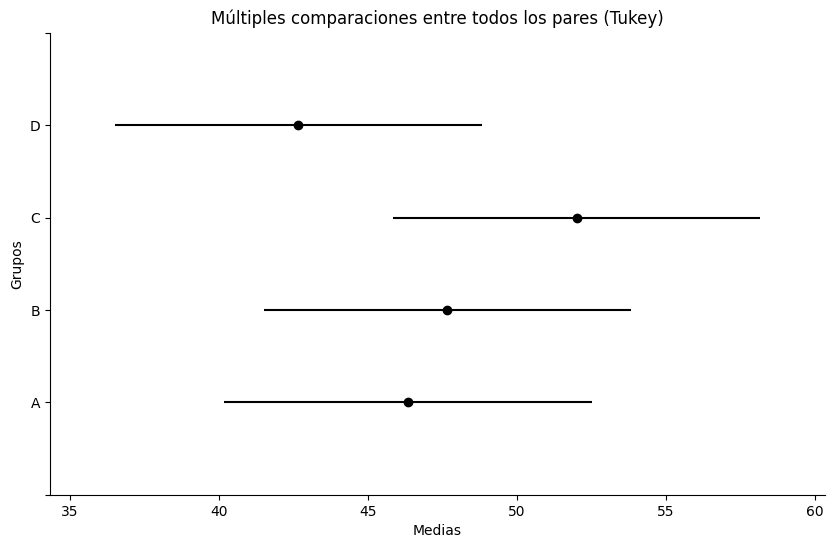

In [101]:
#Joseve Sebastian Lopez Martinez
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Tiempo'], groups=df['Detergente'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

#### supuesto de normalidad: test de Shapiro

In [102]:
#Joseve Sebastian Lopez Martinez
df['Detergente'].unique()

array(['A', 'B', 'C', 'D'], dtype=object)

In [103]:
from scipy.stats import shapiro
#Joseve Sebastian Lopez Martinez
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['Detergente'] == 'A']['Tiempo'], "Grupo A", nivel_de_significancia)
prueba_shapiro(df[df['Detergente'] == 'B']['Tiempo'], "Grupo B", nivel_de_significancia)
prueba_shapiro(df[df['Detergente'] == 'C']['Tiempo'], "Grupo C", nivel_de_significancia)
prueba_shapiro(df[df['Detergente'] == 'D']['Tiempo'], "Grupo D", nivel_de_significancia)


Prueba de Shapiro-Wilk para Grupo A:
Estadístico: 0.9231
Valor p: 0.4633
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo B:
Estadístico: 0.9796
Valor p: 0.7262
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo C:
Estadístico: 0.8421
Valor p: 0.2196
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo D:
Estadístico: 0.9908
Valor p: 0.8168
Interpretación: Los datos tienen una distribución normal.


#### supuesto homoscedasticidad: test de Barlett

In [104]:
from scipy.stats import bartlett
#Joseve Sebastian Lopez Martinez
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(

    df[df['Detergente'] == 'A']['Tiempo'],
    df[df['Detergente'] == 'B']['Tiempo'],
    df[df['Detergente'] == 'C']['Tiempo'],
    df[df['Detergente'] == 'D']['Tiempo'],
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")

Estadístico de Bartlett: 0.37465493357079493
Valor p: 0.9454269614278242
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


#### conclusiones

Dado que tanto los detergentes como las lavadoras tienen un efecto significativo sobre la blancura, se puede concluir que los factores detergente y lavadora afectan significativamente el rendimiento del lavado. Además, las varianzas son homogéneas, lo que refuerza la validez del ANOVA realizado.

<br>

En resumen, tanto el tipo de detergente como el modelo de la lavadora tienen un efecto significativo sobre la blancura, y no hay evidencia de variabilidad en las varianzas, lo que respalda la conclusión de que los factores analizados tienen un impacto importante.


## Problema 4
Con respecto al problema anterior:<br>
a) Conteste los tres incisos del problema anterior sin tomar en cuenta el efecto de las lavadoras y obtenga conclusiones.  
b) ¿Hay diferencias en las conclusiones anteriores y las del problema anterior? Explique su respuesta.  
c) ¿Con cuáles conclusiones se queda? Explique su respuesta.

### a) Conteste los tres incisos del problema anterior sin tomar en cuenta el efecto de las lavadoras y obtenga conclusiones.





#### a) Señale el nombre del diseño experimental utilizado.

Diseño en bloques completamente al azar

#### b) Formule la hipótesis que se quiere probar en este problema ( sin tomar en cuenta el efecto de las lavadoras).

Se investigará si el tipo de detergente tiene un impacto significativo en los resultados de blancura, sin tomar en cuenta el posible efecto de los modelos de lavadora.

Este análisis permitirá determinar si los diferentes detergentes ofrecen rendimientos significativamente distintos en cuanto a la blancura de la ropa, independientemente de las variaciones entre lavadoras.

#### c) Realice el análisis estadístico más apropiado para estos datos y obtenga conclusiones ( sin tomar en cuenta el efecto de las lavadoras).

In [105]:
#Joseve Sebastian Lopez Martinez
data = """
Detergente,Tiempo
A,45
A,43
A,51
B,47
B,44
B,52
C,50
C,49
C,57
D,42
D,37
D,49
"""

# Convertimos los datos en un DataFrame
df = pd.read_csv(StringIO(data))


nivel_de_significancia = 0.05


interes = 'Detergente'      # La variable que me interesa comparar
respuesta = 'Tiempo'     # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")




Resultados del ANOVA:
                   sum_sq   df         F   PR(>F)
C(Detergente)  133.666667  3.0  2.002497  0.19229
Residual       178.000000  8.0       NaN      NaN

Conclusión: No hay diferencias significativas entre los tratamientos.


##### conclusiones

Al realizar el análisis estadístico de los datos de "blancura" de los detergentes sin considerar el efecto de la lavadora, los resultados del ANOVA muestran que no hay diferencias significativas entre los detergentes (p-valor = 0.19229, mayor que el nivel de significancia de 0.05). Esto indica que, en términos generales, no se puede concluir que uno de los detergentes sea significativamente mejor que otro para mejorar la blancura de las prendas, bajo las condiciones de este estudio.



### b) ¿Hay diferencias en las conclusiones anteriores y las del problema anterior? Explique su respuesta.


Sí, hay una diferencia clara entre las conclusiones obtenidas en el análisis con y sin tener en cuenta el efecto de la lavadora.

<br>

La diferencia entre las conclusiones radica en que la lavadora tiene un impacto significativo en los resultados, y al excluirla del análisis, estamos perdiendo información crucial sobre cómo las combinaciones de detergentes y lavadoras afectan los resultados. Al no tener en cuenta este factor, las diferencias entre los detergentes no son tan evidentes, lo que lleva a una conclusión incorrecta de que no hay diferencias significativas entre ellos.

<br>

Al eliminar el efecto de la lavadora, se observa que la variabilidad en los resultados es demasiado grande para detectar diferencias claras entre los detergentes

<br>

En resumen, sin considerar la lavadora, los detergentes parecen tener un rendimiento similar.

### c) ¿Con cuáles conclusiones se queda? Explique su respuesta.

Me quedaría con las conclusiones obtenidas al considerar tanto el efecto de los detergentes como el de las lavadoras.

<br>

La razón de esta elección se debe a que este análisis refleja de manera más precisa la realidad del experimento, considerando que ambos factores (detergentes y lavadoras) tienen un impacto en el resultado, esto proporciona un análisis más robusto y aplicable a situaciones reales, donde ambos factores son importantes para evaluar el rendimiento de los detergentes.



## Problema 5
Una de las variables críticas en el proceso de ensamble del brazo lector de un disco duro es el ángulo que este forma con el cuerpo principal de la cabeza lectora. Se corre un experimento con el objetivo de comparar dos equipos que miden dicho ángulo en unidades de radianes. Se decide utilizar como factor de bloque a los operadores de los equipos. Los resultados se muestran en la siguiente tabla:

| Operador | Equipo 1                                         | Equipo 2                                         |
|----------|--------------------------------------------------|--------------------------------------------------|
| 1        | 1.328, 0.985, 1.316, 1.553, 1.310               | 1.273, 0.985, 1.134, 1.412, 0.917               |
|          | 1.113, 1.057, 1.144, 1.485, 1.386               | 0.789, 0.671, 0.554, 1.386, 1.289               |
| 2        | 1.269, 1.268, 1.091, 1.195, 1.380               | 1.036, 0.783, 1.108, 1.129, 1.132               |
|          | 1.093, 0.984, 1.087, 1.482, 1.442               | 0.201, 0.900, 0.916, 1.434, 1.223               |
| 3        | 1.440, 1.079, 1.389, 1.611, 1.445               | 1.454, 1.063, 1.219, 1.602, 1.583               |
|          | 1.150, 1.190, 1.247, 1.617, 1.574               | 1.018, 1.050, 0.997, 1.538, 1.478               |

### Preguntas y ejercicios:
a) Plantee el modelo y las hipótesis más adecuadas al problema.  
b) ¿Existen diferencias entre los equipos? Argumente estadísticamente.  
c) ¿Existen diferencias entre los operadores?  
d) Dibuje los diagramas de cajas simultáneos y las gráficas de medias para ambos factores, después interprételas.  
e) Verifique los supuestos de normalidad e igualdad de varianza entre tratamientos, así como la posible presencia de puntos aberrantes.


## Problema 6
Un aspecto crítico para que se conserve la leche es la temperatura de almacenamiento. De manera tradicional se han usado termómetros de mercurio (Mer) para verificar que la temperatura sea la adecuada, pero ahora se han comprado termómetros electrónicos (Rtd) para facilitar el proceso de medición. Sin embargo, se duda de las mediciones de estos nuevos dispositivos. Para aclarar dudas y diagnosticar la situación, durante cinco días se toman mediciones con ambos tipos de termómetros en varios silos (a la misma hora). Los datos para cinco silos se muestran a continuación:

| Silo | Día 1 (Mer) | Día 1 (Rtd) | Día 2 (Mer) | Día 2 (Rtd) | Día 3 (Mer) | Día 3 (Rtd) | Día 4 (Mer) | Día 4 (Rtd) | Día 5 (Mer) | Día 5 (Rtd) |
|------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|--|
| A    | 4.0         | 2.6         | 4.0         | 2.8         | 5.0         | 5.0         | 0.5         | 0.0         | 3.0         | 2.4         |
| B    | 5.0         | 6.4         | 6.0         | 6.4         | 2.0         | 2.3         | 4.0         | 4.2         | 4.0         | 4.0         |
| C    | 4.5         | 3.3         | 4.0         | 1.4         | 3.5         | 1.8         | 2.0         | -1.9        | 3.0         | -7.6        |
| D    | 2.5         | 3.1         | 4.0         | 5.0         | 6.5         | 6.6         | 4.5         | 2.7         | 4.0         | 4.0         |
| E    | 4.0         | 0.0         | 4.0         | 3.5         | 0.6         | 2.0         | -4.0        | -4.0        | -4.0        | -6.3        |

**Preguntas:**<br>
a) Observe los datos y establezca una conjetura acerca de la confiabilidad de las mediciones con Rtd (del termómetro de mercurio no hay duda).  
b) Es claro que el silo se puede ver como tratamiento y día como bloque. Considere sólo los datos de Rtd y establezca el modelo estadístico. También haga el ANOVA correspondiente y obtenga conclusiones.  
c) Repita el inciso anterior pero ahora para las mediciones Mer.  
d) ¿Las conclusiones obtenidas en los incisos anteriores coinciden? Comente su respuesta.  
e) Datos pareados. Para comparar los dos métodos de medición (Mer y Rtd) obtenga como variable de respuesta la diferencia de temperatura que registran los métodos para cada día en cada silo. Considerando esto, establezca el modelo estadístico, haga el ANOVA correspondiente y obtenga conclusiones.


## Problema 7
Se quiere estudiar el efecto de cinco diferentes catalizadores (**A, B, C, D y E**) sobre el **tiempo de reacción** de un proceso químico. Cada lote de material sólo permite cinco corridas y cada corrida requiere aproximadamente 1.5 horas, por lo que sólo se pueden realizar cinco corridas diarias. El experimentador decide correr los experimentos con un diseño en cuadro latino para controlar activamente a los **lotes y días**. Los datos obtenidos son:

| Lote | Día 1 | Día 2 | Día 3 | Día 4 | Día 5 |
|------|-------|-------|-------|-------|-------|
| 1    | A = 8 | B = 7 | D = 1 | C = 7 | E = 3 |
| 2    | C = 11| E = 2 | A = 7 | D = 3 | B = 8 |
| 3    | B = 4 | A = 9 | C = 10| E = 1 | D = 5 |
| 4    | D = 6 | C = 8 | E = 6 | B = 6 | A = 10|
| 5    | E = 4 | D = 2 | B = 3 | A = 8 | C = 8 |


**Preguntas:**<br>
a) ¿Cómo se aleatorizó el experimento?  
b) Anote la ecuación del modelo y las hipótesis estadísticas correspondientes.  
c) ¿Existen diferencias entre los tratamientos? ¿Cuáles tratamientos son diferentes entre sí?  
d) ¿Los factores de ruido, lote y día afectan el tiempo de reacción del proceso?  
e) Dibuje los gráficos de medias para los tratamientos, los lotes y los días. ¿Cuál tratamiento es mejor?  
f) Verifique los supuestos del modelo, considerando que los datos se obtuvieron columna por columna, día a día.


## Problema 8
En el problema anterior elimine el factor de bloque días, y conteste:

a) ¿Se justifica la eliminación?  
b) Sin tomar en cuenta el día, señale el nombre del diseño, el modelo y las hipótesis más adecuadas al problema.  
c) Pruebe las hipótesis y obtenga conclusiones.  
d) Compare el cuadro medio del error, en este caso con el del problema anterior. ¿Qué observa? ¿Cómo lo explica?  
e) ¿Por qué se obtienen las mismas conclusiones en los tratamientos de este problema y del anterior?


## Problema 9
Con respecto a los problemas 7 y 8, además de eliminar el factor día ahora elimine el factor lote, y conteste lo siguiente:

a) ¿Se justifica esta segunda eliminación en ambos problemas?  
b) Después de la doble eliminación, señale el nombre del diseño, el modelo y la(s) hipótesis más adecuada(s) al problema.  
c) Pruebe las hipótesis y obtenga conclusiones.  
d) Compare el cuadro medio del error obtenido con los de los problemas 16 y 17. ¿Qué observa? ¿Cómo lo explica?  
e) ¿Por qué se obtienen las mismas conclusiones en los tratamientos de este problema y de los dos anteriores?  
f) ¿Cree que esta eliminación hubiese afectado si los factores de bloque hubieran sido significativos?  


## Problema 10
Se comprueba el peso en gramos de un material de tres proveedores: **A, B y C**, por tres diferentes inspectores: **I, II y III**, utilizando tres diferentes escalas: **1, 2 y 3**. El experimento se lleva a cabo como el siguiente cuadro latino:

| Inspector | Escala 1 | Escala 2 | Escala 3 |
|-----------|----------|----------|----------|
| I         | A = 16   | B = 10   | C = 11   |
| II        | B = 15   | C = 9    | A = 14   |
| III       | C = 13   | A = 11   | B = 13   |

**Preguntas:**<br>
a) ¿Hay diferencias entre los proveedores?  
b) ¿Hay diferencias entre los inspectores y entre las escalas?  
c) Si el peso debe ser 15 g, ¿cuál proveedor es mejor?  
d) Si algún factor de bloque es no significativo, elimínelo y haga el análisis adecuado.  


In [106]:
#Joseve Sebastian Lopez Martinez
data = '''
Inspector,Escala,Categoría,Valor
I,Escala 1,A,16
I,Escala 2,B,10
I,Escala 3,C,11
II,Escala 1,B,15
II,Escala 2,C,9
II,Escala 3,A,14
III,Escala 1,C,13
III,Escala 2,A,11
III,Escala 3,B,13
'''

df = pd.read_csv(StringIO(data))
df

,Inspector,Escala,Categoría,Valor
0,I,Escala 1,A,16
1,I,Escala 2,B,10
2,I,Escala 3,C,11
3,II,Escala 1,B,15
4,II,Escala 2,C,9
5,II,Escala 3,A,14
6,III,Escala 1,C,13
7,III,Escala 2,A,11
8,III,Escala 3,B,13


In [107]:
#Joseve Sebastian Lopez Martinez
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Nivel de significancia
nivel_de_significancia = 0.05

# Configuración de variables
bloque_1 = 'Inspector'   # Primer bloque (factor no principal)
bloque_2 = 'Escala'      # Segundo bloque (factor no principal)
interes = 'Categoría'       # Variable de interés (tratamiento)
respuesta = 'Valor'  # Variable de respuesta (medición) que permite la comparación

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloque_1}) + C({bloque_2})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA para el Cuadro Latino:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas: {interes}.")
else:
    print(f"\nConclusión: No hay diferencias significativas: {interes}.")

if tabla_anova["PR(>F)"][f"C({bloque_1})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_1}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_1}.")

if tabla_anova["PR(>F)"][f"C({bloque_2})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_2}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_2}.")


Resultados del ANOVA para el Cuadro Latino:
                 sum_sq   df      F    PR(>F)
C(Categoría)  10.888889  2.0   49.0  0.020000
C(Inspector)   0.222222  2.0    1.0  0.500000
C(Escala)     32.888889  2.0  148.0  0.006711
Residual       0.222222  2.0    NaN       NaN

Conclusión: Hay diferencias significativas: Categoría.
Conclusión: No hay diferencias significativas: Inspector.
Conclusión: Hay diferencias significativas: Escala.


### a) ¿Hay diferencias entre los proveedores?

Si hay diferencia significativa

### b) ¿Hay diferencias entre los inspectores y entre las escalas?

<h2>¿Hay diferencias entre los inspectores?</h2>

No hay diferencias significativas entre los inspectores, lo que indica que su desempeño no influye significativamente en los resultados.

<br>

<h2>¿Hay diferencias entre las escalas?</h2>

Sí hay diferencias significativas entre las escalas, lo que significa que el tipo de escala utilizado tiene un impacto importante en los resultados de las mediciones de peso del material.

### c) Si el peso debe ser 15 g, ¿cuál proveedor es mejor?

Aunque ninguno de los proveedores tiene un peso promedio exactamente igual a 15 g, el proveedor A es el más cercano al objetivo de 15 g, con un promedio de 13.67 g.

Por lo tanto, el proveedor A sería el mejor en cuanto a acercarse al peso objetivo de 15 g.

### d) Si algún factor de bloque es no significativo, elimínelo y haga el análisis adecuado.

In [108]:
#Joseve Sebastian Lopez Martinez
# Nivel de significancia
nivel_de_significancia = 0.05

# Configuración de variables

bloque_1 = 'Escala'      # Segundo bloque (factor no principal)
interes = 'Categoría'       # Variable de interés (tratamiento)
respuesta = 'Valor'  # Variable de respuesta (medición) que permite la comparación

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloque_1}) + C({bloque_2})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA para el Cuadro Latino:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas: {interes}.")
else:
    print(f"\nConclusión: No hay diferencias significativas: {interes}.")

if tabla_anova["PR(>F)"][f"C({bloque_1})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_1}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_1}.")




Resultados del ANOVA para el Cuadro Latino:
                 sum_sq   df      F    PR(>F)
C(Categoría)  10.888889  2.0   49.0  0.001538
C(Escala)     32.888889  2.0  148.0  0.000178
Residual       0.444444  4.0    NaN       NaN

Conclusión: Hay diferencias significativas: Categoría.
Conclusión: Hay diferencias significativas: Escala.


#### análisis

<h1><b>Diferencias significativas en los proveedores (Categoría):</b></h1>

El análisis muestra que sí hay diferencias entre los proveedores. Esto implica que la calidad o el peso de los materiales de los proveedores A, B y C no son iguales. Por lo tanto, se podría investigar más a fondo para identificar qué proveedor tiene un rendimiento más consistente o cercano al peso deseado (15 g).

<br>

<h1><b>Diferencias significativas entre las escalas:</b></h1>

También se encuentra que la escala utilizada (Escala 1, Escala 2, Escala 3) afecta significativamente las mediciones. Esto sugiere que el tipo de escala tiene un impacto relevante en los resultados y debe ser considerado al tomar decisiones sobre qué escala utilizar para la medición del peso.

<br>

<h1><b>conclusiones</b></h1>

El factor de bloque Inspector se eliminó del análisis debido a que no mostró ser significativo, lo que significa que no tenía un impacto relevante en los resultados.

Este análisis permite concluir que tanto los proveedores como las escalas tienen un impacto importante en las mediciones, lo que debe ser considerado en futuras decisiones sobre cuál proveedor elegir y qué escala utilizar para la medición.

## Problema 11
Cuando se comparan varios fertilizantes o diferentes variedades de cierto cultivo, es típico que se deba considerar el gradiente de fertilidad del suelo (factor columna) o los efectos residuales de cultivos previos (factor renglón). Considerando estos factores de bloque, Gomez y Gomez (1984) plantean un experimento en cuadro latino para comparar, en cuanto a rendimiento en toneladas por hectárea, tres variedades de maíz híbrido (**A, B, C**) y una variedad control (**D**). Para ello, se utiliza un campo agrícola cuadrado de 16 hectáreas, dividido en parcelas de una hectárea. Los datos de rendimiento obtenidos en cada parcela se muestran a continuación:

| Ren\Col | 1       | 2       | 3       | 4       |
|---------|---------|---------|---------|---------|
| 1       | 1.640(B)| 1.210(D)| 1.425(C)| 1.345(A)|
| 2       | 1.475(C)| 1.185(A)| 1.400(D)| 1.290(B)|
| 3       | 1.670(A)| 0.710(C)| 1.665(B)| 1.180(D)|
| 4       | 1.565(D)| 1.290(B)| 1.655(A)| 0.660(C)|

**Preguntas y ejercicios:**<br>
a) ¿Existen diferencias en los rendimientos de las diferentes variedades de maíz?  
b) ¿Cuál de los factores de bloque tuvo efectos?  
c) ¿Se habrían detectado las mismas diferencias en los tratamientos con un diseño completamente al azar?  
d) ¿Y con un diseño en bloques completos al azar?  


## Problema 12
Se quieren comparar tres dietas (**A, B, C**) a base de proteínas de origen vegetal utilizando 18 ratas de laboratorio de una misma camada. Primero se observa por un tiempo el apetito para formar tres grupos de seis ratas, según su voracidad; y cada uno de estos grupos se clasifica a su vez en tres grupos de dos ratas, de acuerdo a su peso inicial. Se plantea un experimento donde la variable de respuesta es el peso en gramos ganado por las ratas después de cierto periodo, con los siguientes resultados:

| Apetito/peso inicial | A1        | A2        | A3        |
|-----------------------|-----------|-----------|-----------|
| P1                   | 67 (C)    | 105 (A)   | 95 (B)    |
|                       | 72        | 112       | 86        |
| P2                   | 85 (A)    | 75 (B)    | 88 (C)    |
|                       | 98        | 67        | 110       |
| P3                   | 66 (B)    | 68 (C)    | 108 (A)   |
|                       | 47        | 91        | 120       |

### Preguntas:
a) Analice los datos. ¿Cuáles de los factores influyen en el peso ganado por las ratas?  
b) ¿Cuál dieta es mejor?  
c) ¿Alguno de los factores de bloque puede ser ignorado? Argumente su respuesta.  
d) Si ese fuera el caso, analice de nuevo el experimento y saque conclusiones.  
e) Verifique los supuestos del modelo.  


## Problema 13
Una compañía distribuidora ubicada en los suburbios está interesada en estudiar la diferencia en costos (tiempo y gasolina) entre las cuatro rutas (**A, B, C, D**) que llevan a la zona comercial, más importante para ellos, en el otro extremo de la ciudad. Deciden correr un experimento en cuadro grecolatino controlando los factores de bloque **chofer**, marca de vehículo (**α, β, χ, δ**) y día de la semana. El experimento se repite en dos semanas diferentes, en las cuales no hay días festivos ni quincenas. Los costos observados en pesos se muestran en la siguiente tabla:

| Chofer/día | Lunes       | Martes      | Miércoles   | Jueves      |
|------------|-------------|-------------|-------------|-------------|
| Carlos     | 825(D, α)   | 585(C, χ)   | 550(B, β)   | 580(A, δ)   |
|            | 750         | 610         | 580         | 650         |
| Enrique    | 650(A, χ)   | 540(B, α)   | 580(C, χ)   | 850(D, β)   |
|            | 725         | 560         | 635         | 770         |
| Genaro     | 700(C, β)   | 650(D, δ)   | 635(A, α)   | 450(B, χ)   |
|            | 675         | 740         | 540         | 550         |
| Luis       | 475(B, δ)   | 560(A, β)   | 650(D, α)   | 670(C, α)   |
|            | 480         | 615         | 725         | 730         |

### Preguntas:
a) Haga el análisis de varianza de este experimento.  
b) Realice las pruebas de comparaciones múltiples para los factores significativos.  
c) Represente los tratamientos y factores de bloque usando gráficas de medias y diagramas de dispersión.  
d) ¿Cuál es la mejor ruta? ¿Cuál es la peor?  
e) ¿Hay diferencias significativas entre los choferes? ¿Y entre el tipo o marca de unidad?  
f) ¿Cuáles factores de bloque valió la pena tomar en cuenta en el experimento?  
g) ¿Por qué se evitaron días festivos y quincenas en el experimento? ¿Cuáles otros aspectos se tenían que tomar en cuenta?  
h) Verifique los supuestos del modelo.  


## Problema 14
23. Un investigador está interesado en el efecto del porcentaje de lisina y del porcentaje de proteína en la producción de vacas lecheras. Se consideran siete niveles en cada factor:

- **% de lisina**: 0.0 (**A**), 0.1 (**B**), 0.2 (**C**), 0.3 (**D**), 0.4 (**E**), 0.5 (**F**), 0.6 (**G**).  
- **% de proteína**: 2 (**α**), 4 (**β**), 6 (**χ**), 8 (**δ**), 10 (**ε**), 12 (**φ**), 14 (**γ**).  

Para el estudio, se seleccionaron siete vacas al azar, a las cuales se les da un seguimiento de siete periodos de tres meses. Los datos en galones de leche fueron los siguientes:

| Vaca/periodo | 1       | 2       | 3       | 4       | 5       | 6       | 7       |
|--------------|---------|---------|---------|---------|---------|---------|---------|
| 1            | 304 (Aα)| 436 (Bε)| 350 (Cβ)| 504 (Dφ)| 417 (Eχ)| 519 (Fγ)| 432 (Gδ)|
| 2            | 381 (Bβ)| 505 (Cφ)| 425 (Dχ)| 564 (Eγ)| 487 (Fα)| 536 (Gε)| 483 (Aχ)|
| 3            | 432 (Cχ)| 566 (Dγ)| 479 (Eε)| 357 (Fα)| 466 (Gβ)| 465 (Aφ)| 507 (Bγ)|
| 4            | 442 (Dδ)| 372 (Eχ)| 536 (Fε)| 366 (Gβ)| 495 (Aχ)| 425 (Bφ)| 507 (Cγ)|
| 5            | 496 (Eε)| 449 (Fβ)| 493 (Gφ)| 345 (Aχ)| 509 (Bγ)| 481 (Cδ)| 380 (Dα)|
| 6            | 534 (Fφ)| 421 (Gχ)| 352 (Aγ)| 427 (Bδ)| 346 (Cχ)| 478 (Dε)| 397 (Eβ)|
| 7            | 543 (Gγ)| 386 (Aδ)| 435 (Bα)| 485 (Cε)| 406 (Dφ)| 554 (Eφ)| 410 (Fχ)|

### Preguntas y ejercicios:
a) Analice este experimento. ¿Qué factores tienen efecto en la producción de leche?  
b) Interprete los resultados usando gráficos de medias.  
c) ¿Cómo puede explicar la falta de efectos en vacas y periodo?  
d) ¿Qué porcentajes de lisina y proteína dan los mejores resultados?  
e) Verifique los supuestos del modelo.  
